# **Grupo 5**
Pedro Paulo Costa Pereira - A88062

Tiago André Oliveira Leite - A91693

In [257]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute, IBMQ
from qiskit.tools.visualization import plot_histogram, visualize_transition
from qiskit.tools import job_monitor
import matplotlib.pyplot as plt
import numpy as np

## Formula booleana 3-SAT 

$F = (A \lor B \lor C) \land (A \lor B \lor \neg C)  \land (A \lor \neg B \lor C) \land (A \lor \neg B \lor \neg C) \land (\neg A \lor B \lor C) \land (\neg A \lor B \lor \neg C) \land (\neg A \lor \neg B \lor C)$ 

### Verificar que tem solução

 *Seja:*
 
 $f_1 = A \lor B \lor C$ $\qquad$ $f_2 = A \lor B \lor \neg C$ $\qquad$ $f_3 = A \lor \neg B \lor C$ $\qquad$ 
 $f_4 = A \lor \neg B \lor \neg C$ $\qquad$ $f_5 = \neg A \lor B \lor C$
 
 $f_6 = \neg A \lor B \lor \neg C$ $\qquad$ $f_7 = \neg A \lor \neg B \lor C$
 
 <br>
 
 A | B | C | $f_1$ | $f_2$ | $f_3$ | $f_4$ | $f_5$ | $f_6$ | $f_7$ | $F$
:-:|:-:|:-:|:------|:------|:------|:------|:------|:------|:------|:-- 
 1 | 1 | 1 |   1   |   1   |   1   |   1   |   1   |   1   |   1   |  1
 1 | 1 | 0 |   1   |   1   |   1   |   1   |   1   |   1   |   0   |  0
 1 | 0 | 1 |   1   |   1   |   1   |   1   |   1   |   0   |   1   |  0
 1 | 0 | 0 |   1   |   1   |   1   |   1   |   0   |   1   |   1   |  0
 0 | 1 | 1 |   1   |   1   |   1   |   0   |   1   |   1   |   1   |  0
 0 | 1 | 0 |   1   |   1   |   0   |   1   |   1   |   1   |   1   |  0
 0 | 0 | 1 |   1   |   0   |   1   |   1   |   1   |   1   |   1   |  0
 0 | 0 | 0 |   0   |   1   |   1   |   1   |   1   |   1   |   1   |  0
 
 
<br>

*Solução:* 

$A = 1 \qquad B = 1 \qquad C = 1$


In [226]:
def execute_circuit(qc, shots=1024, decimal=False):
    
    #define backend
    device = Aer.get_backend('qasm_simulator')
    #get counts
    counts = device.run(qc, shots=shots).result().get_counts()
    
    if decimal:
        counts = dict((int(a[::-1],2),b) for (a,b) in counts.items())
    else:
        counts = dict((a[::-1],b) for (a,b) in counts.items())

    return counts

In [227]:
def init(n,a):
    qr = QuantumRegister(n)
    ancilla = QuantumRegister(a)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr,ancilla,cr)
    
    qc.h(qr)
    qc.x(ancilla)
    qc.h(ancilla)
    qc.barrier() 
    
    return qc, qr, ancilla, cr

In [248]:
def oracle(qr, ancilla):
    qc = QuantumCircuit(qr,ancilla)
    
    # f1
    qc.x(qr)
    qc.mcx(qr,ancilla[0])
    qc.x(ancilla[0])
    qc.x(qr)
    
    #f2
    qc.x(qr[0])
    qc.x(qr[1])
    qc.mcx(qr,ancilla[1])
    qc.x(ancilla[1])
    qc.x(qr[0])
    qc.x(qr[1])
    
    #f3
    qc.x(qr[0])
    qc.x(qr[2])
    qc.mcx(qr,ancilla[2])
    qc.x(ancilla[2])
    qc.x(qr[0])
    qc.x(qr[2])
    
    #f4
    qc.x(qr[0])
    qc.mcx(qr,ancilla[3])
    qc.x(ancilla[3])
    qc.x(qr[0])
    
    
    #f5
    qc.x(qr[1])
    qc.x(qr[2])
    qc.mcx(qr,ancilla[4])
    qc.x(ancilla[4])
    qc.x(qr[1])
    qc.x(qr[2])
    
    #f6
    qc.x(qr[1])
    qc.mcx(qr,ancilla[5])
    qc.x(ancilla[5])
    qc.x(qr[1])
    
    #f7
    qc.x(qr[2])
    qc.mcx(qr,ancilla[6])
    qc.x(ancilla[6])
    qc.x(qr[2])
    
    
    
    #F
    qc.mcx(ancilla[:-1],ancilla[-1])
    
    qc.barrier()
    return qc

In [249]:
def diffusion_operator(qr, ancilla):

    qc = QuantumCircuit(qr,ancilla)

    #hadamards para passar |psi_0> para |0>
    qc.h(qr)

    #alpha - inverte apenas o |0>
    qc.x(qr)
    qc.h(qr[-1])
    
    qc.mcx(qr[:-1],qr[-1])
    
    qc.h(qr[-1])
    qc.x(qr)
    #hadamards para passar |0> para |psi_0> 
    qc.h(qr)
    
    qc.barrier()
    
    return qc 

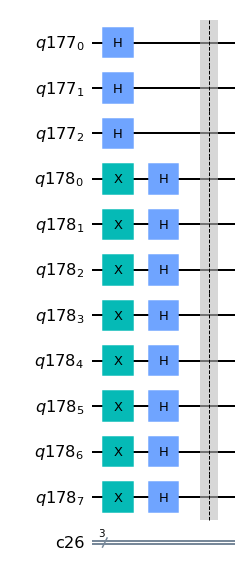

In [250]:
n = 3
a = 8
qc, qr, ancilla, cr = init(n,a)
qc.draw("mpl")

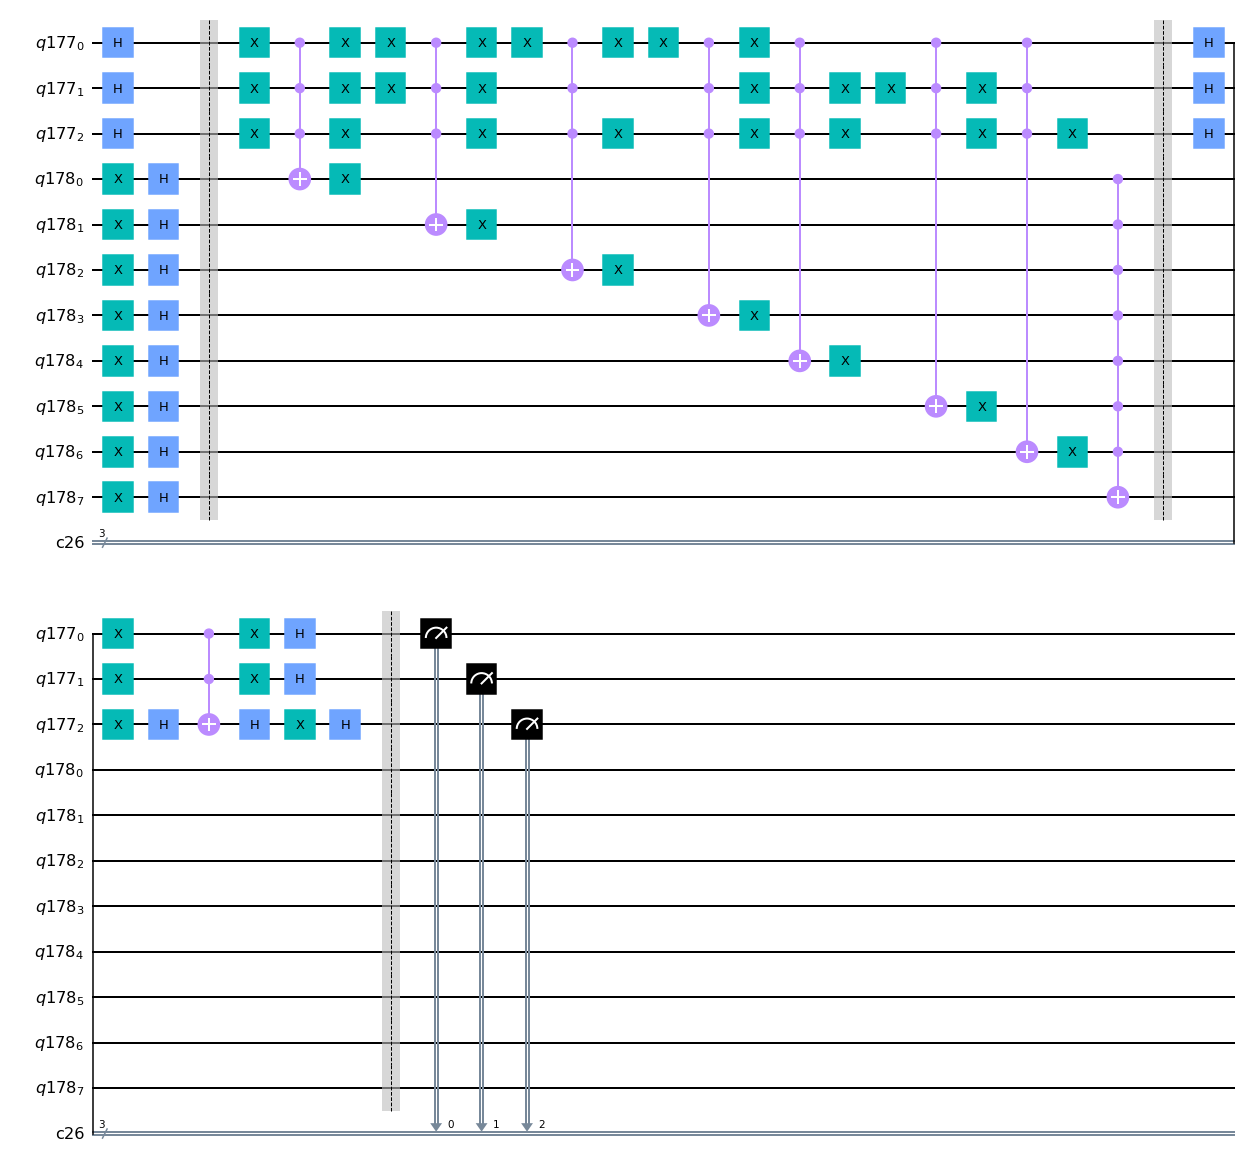

In [251]:
elements = 3

iterations= int(np.floor(np.pi/4 * np.sqrt(elements)))

for j in range(iterations):
    qc = qc.compose(oracle(qr,ancilla))
    qc = qc.compose(diffusion_operator(qr,ancilla))
    pass
qc.measure(qr,cr)
qc.draw(output="mpl")

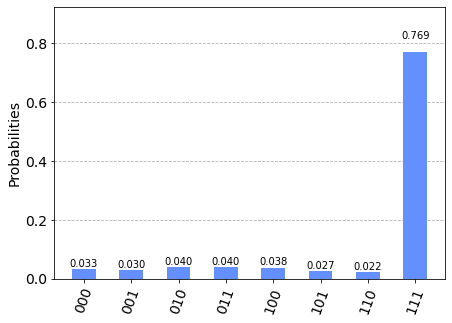

In [252]:
counts = execute_circuit(qc)
plot_histogram(counts)

## Executar numa maquina real

In [253]:
#executar apenas uma vez
#token = 'copiar token da conta ibm'  
#IBMQ.active_account()
#IBMQ.save_account(token, overwrite=True)
#IBMQ.load_account()

In [258]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [261]:
provider = IBMQ.get_provider()
provider.backends(simulator=False, operational=True)

[<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [133]:
backend = provider.get_backend('ibm_nairobi')
backend.configuration().n_qubits

7

In [134]:
job = execute(qc,backend)

In [135]:
job_monitor(job)

Job Status: job has successfully run


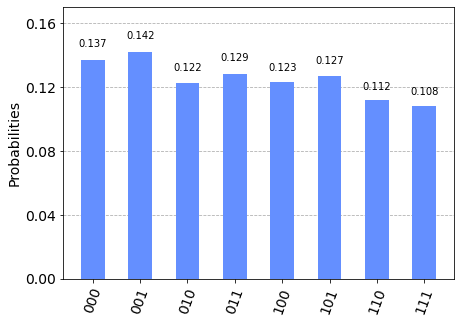

In [136]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)